Philip McCormick

April 25, 2022

MSDS 599

Homework 5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data 599/Country-data.csv')

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
x=df.drop(['country'],axis=1)
y=df['country']

Perform PCA with 2 principal components. Be sure to scale the data using StandardScaler first. 5

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
x_scaled=StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=2)
pca.fit(x_scaled)

PCA(n_components=2)

Look at the first two principal components. Is it possible to give a rough interpretation of their meaning? 5

In [ ]:
print(pca.components_)

[[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]]


In [ ]:
x.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In order to give a rough interpretation of the principal components we have to look at the largest coordinates in each PC. For the first PC we have a child_mort of -.42, life_expec of .426, and -.404 of total_fer. These are telling us in order to get to the 2-dimensional point of PC1 we are have large decreases in child_mort and total_fer, and a large incease in life_expec.

For the second principal component we see large effects for exports of .613 and imports of .673, with smaller changes moving in the opposite direction of PC1 in child_mort (.193), life_expec (-.223), and total_fer (.155).

These together show a heavy roll of PC2 for imports and exports, and for PC1 in child_mort, life_expec, and total_fer. This is indicative of how developing countries feel the impact of these variables.

How much of the variance in the data is explained by the first 2 principal components. 5

In [ ]:
print(pca.explained_variance_ratio_)

[0.4595174  0.17181626]


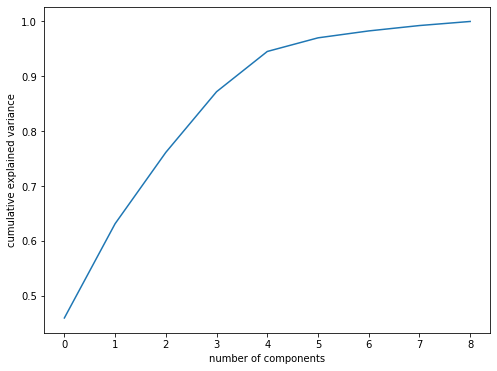

In [ ]:
pca=PCA().fit(x_scaled)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

About 75% of the variance is explained by the first two princiapl components.

Following the USA crime example in the notebook from class, see if you can plot the countries using the coordinates of their first two principal components. Does this make sense given your interpretation above? Does anything stand out? (Hint: The plot is a bit crowded with the text beside each point. It may be helpful to make a few plots with only 50 or so countries at a time to make it more readable.) 5

TypeError: ignored

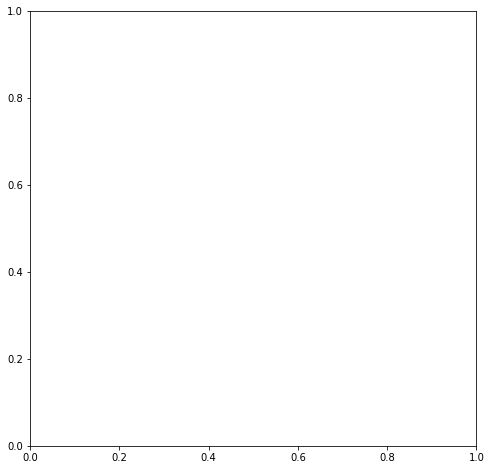

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
xx=pca[:,0]
yy=pca[:,1]
ax.scatter(xx,yy)
plt.xlabel('PC1')
plt.ylabel('PC2')
for i,txt in enumerate(y):
    ax.annotate(txt, (xx[i], yy[i]))
plt.show()

The distribution of countries makes sense as they relate to PC1 and PC2. Countries with low PC2 and high PC1 are the more developed countries(Japan and the US), and those with higher PC2 have a lower PC1 are those assocaited with developing nations (Haiti and Chad). There are a few outlier countries(Signapore, Malta, and Luxembourg) with high PC1 and PC2, this could be a sign of different scorings for economic and health metrics in these countries.

*code was running when I first did interpretation, not sure what happened to lose visual but tried a number of different fixes and nothing worked